# <a name="setup_section"></a> 1. Setup: Manage Installations Imports and Helper Functions

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

from glob import glob
from sklearn.model_selection import train_test_split

# <a name="loading_datasets"></a> 2. Loading Datasets

## Load metadata

In [3]:
metdata_path = "..\\data\\metadata\\"
metadata = pd.read_csv(metdata_path + "metadata.csv")

## Load raw dataset

In [4]:
raw_meters_path = "..\\data\\meters\\raw\\"

# files in directory
files = glob(raw_meters_path + "*.csv")

In [5]:
dfs = [] # empty list of the dataframes to create
for file in files: # for each file in directory
    meter_type = file.split("\\")[4].split(".")[0] # meter_type to rename the value feature
    meter = pd.read_csv(file) # load the dataset
    meter = pd.melt(meter, id_vars = "timestamp", var_name = "building_id", value_name = "meter_reading") # melt dataset
    meter["meter"] = str(meter_type) # adds column with the meter type
    dfs.append(meter) # append to list
raw_data_cleaned = pd.concat(dfs, axis=0, ignore_index=True) # concatenate all meter
del(dfs, meter, file, files, meter_type)

In [6]:
raw_data_cleaned.head()

,timestamp,building_id,meter_reading,meter
0,2016-01-01 00:00:00,Panther_office_Clementine,NaN,chilledwater
1,2016-01-01 01:00:00,Panther_office_Clementine,NaN,chilledwater
2,2016-01-01 02:00:00,Panther_office_Clementine,NaN,chilledwater
3,2016-01-01 03:00:00,Panther_office_Clementine,NaN,chilledwater
4,2016-01-01 04:00:00,Panther_office_Clementine,NaN,chilledwater


## Load cleaned dataset

In [7]:
cleaned_meters_path = "..\\data\\meters\\cleaned\\"

# files in directory
files = glob(cleaned_meters_path + "*.csv")

In [8]:
dfs = [] # empty list of the dataframes to create
for file in files: # for each file in directory
    meter_type = file.split("\\")[4].split(".")[0] # meter_type to rename the value feature
    meter = pd.read_csv(file) # load the dataset
    meter = pd.melt(meter, id_vars = "timestamp", var_name = "building_id", value_name = "meter_reading") # melt dataset
    meter["meter"] = str(meter_type) # adds column with the meter type
    dfs.append(meter) # append to list
complete_data_cleaned = pd.concat(dfs, axis=0, ignore_index=True) # concatenate all meter
del(dfs, meter, file, files, meter_type)

In [9]:
complete_data_cleaned.head()

,timestamp,building_id,meter_reading,meter
0,2016-01-01 00:00:00,Panther_office_Clementine,NaN,chilledwater_cleaned
1,2016-01-01 01:00:00,Panther_office_Clementine,NaN,chilledwater_cleaned
2,2016-01-01 02:00:00,Panther_office_Clementine,NaN,chilledwater_cleaned
3,2016-01-01 03:00:00,Panther_office_Clementine,NaN,chilledwater_cleaned
4,2016-01-01 04:00:00,Panther_office_Clementine,NaN,chilledwater_cleaned


## Fast Fourier Transformation 


In [122]:
from scipy.fft import fft, fftfreq
from scipy.fft import rfft, rfftfreq
from scipy.fft import ifft, irfft

## Example
####  Construct the signal 

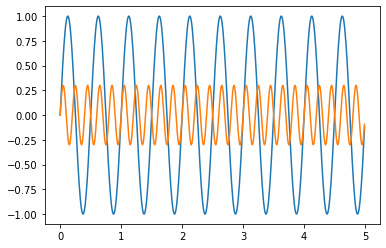

In [261]:
SAMPLE_RATE = 100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration, amplitude):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies) * amplitude
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x2, y2 = generate_sine_wave(2, SAMPLE_RATE, DURATION, 1)
_, y5 = generate_sine_wave(5, SAMPLE_RATE, DURATION, 0.3)
mixed = y2 + y5
plt.plot(x2, y2)
plt.plot(x2, y5)
plt.show()

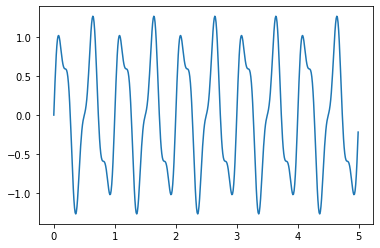

In [262]:
plt.plot(x2,mixed)

In [263]:
print(" size of x: ", np.size(x2))
print(" size of y: ", np.size(mixed))

 size of x:  500
 size of y:  500


C:\Users\marku\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


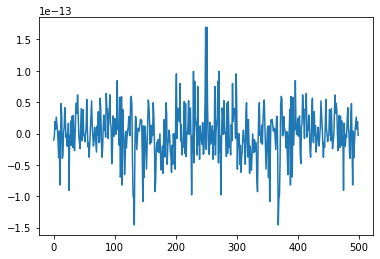

In [264]:
result_fft = fft(mixed)
plt.plot(result_fft)

C:\Users\marku\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


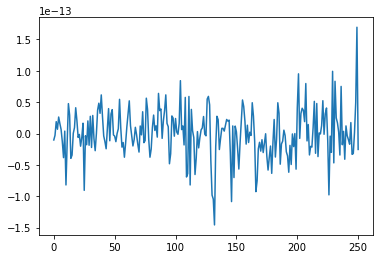

In [265]:
result_rfft = rfft(mixed)
plt.plot(result_rfft)

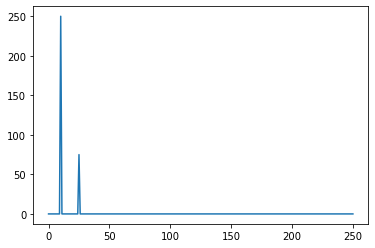

In [282]:
plt.plot(np.abs(yf))

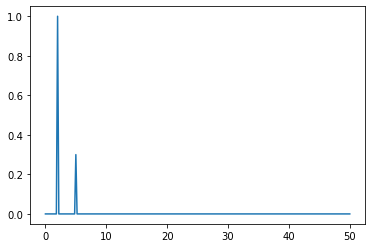

In [283]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = rfft(mixed)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, 0.4/SAMPLE_RATE * np.abs(yf))
plt.show()

******************
index 0
freq [10]
int(f/DURATION) =  2
******************
index 1
freq [25]
int(f/DURATION) =  5


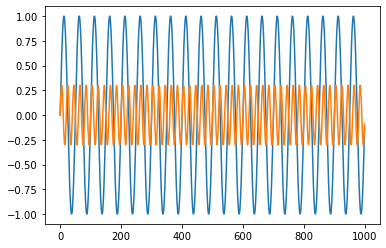

In [277]:
output_signal = np.zeros(SAMPLE_RATE * DURATION * 2 )
for index, freq in enumerate(np.argwhere(np.abs(yf)> 0.001)):
    
    print("******************")
    print("index", index)
    print("freq", freq)
    f = freq[0]
    print("int(f/DURATION) = ", int(f/DURATION))
    
    
    _, y = generate_sine_wave(int(f/DURATION), SAMPLE_RATE, DURATION * 2, 0.4/SAMPLE_RATE * np.abs(yf[f]))
    plt.plot(y)
    output_signal += y

In [281]:
2/(DURATION*SAMPLE_RATE)

0.004

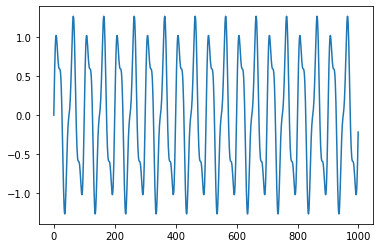

In [278]:
plt.plot(output_signal)

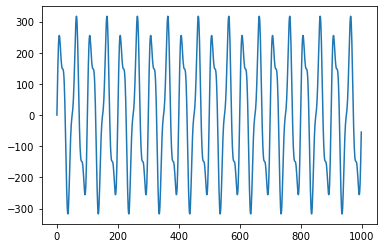

In [276]:
plt.plot(output_signal)

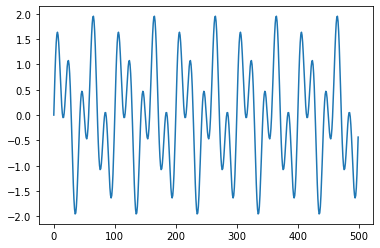

In [251]:
reconstructed_signal = irfft(yf)
plt.plot(reconstructed_signal)

In [26]:
# Frequency and sampling rate
frequency = 3 # frequency
sampling_rate = 100 # sampling rate

# Time component - sampling_rate many values between 0 and 1 in steps of 1/sampling_size
time = np.arange(0,1,1/sampling_rate)
# datapoints is the same as sampling_rate
datapoints = np.size(time) 

frequency_domain = np.linspace(0,1,int(datapoints/2))

# Sine function
signal = np.sin(2 * np.pi * frequency * time) 

In [25]:
datapoints == sampling_rate

True

In [21]:
np.arange(0,1,)

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875])

#### Perform Fourier transform from scipy

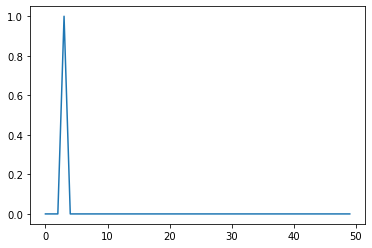

In [24]:
result_fft = fft(signal)
fft_freq = 2/datapoints * abs(result_fft[0:np.size(frequency_domain)])
plt.plot(fft_freq)

# Try with metering data


Helper functions

In [274]:
#create function to center data
center_function = lambda x: x - x.mean()

### Todo
#### Come up with a strategy to handle nan values

Currently - just drop them

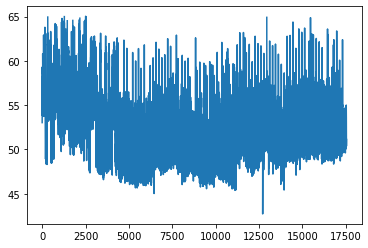

In [26]:
plt.plot(poc_electricity['meter_reading'].to_numpy())
plt.show()

In [27]:
raw_signal = poc_electricity['meter_reading'].to_numpy()
print("Amount of nan values in the signal: ", np.isnan(raw_signal).sum())
print("Fraction of nan values in the signal: ", np.isnan(raw_signal).sum()/ np.size(raw_signal))

Amount of nan values in the signal:  73
Fraction of nan values in the signal:  0.004160966712266302


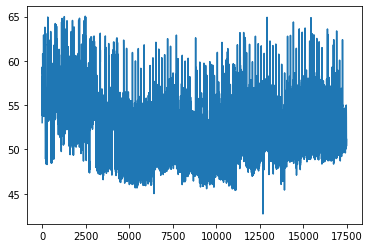

In [28]:
poc_electricity_no_nans = poc_electricity.dropna()
signal = poc_electricity_no_nans['meter_reading'].to_numpy()
plt.plot(signal)
plt.show()

In [29]:
input_points = np.size(signal)
sampling_rate = input_points  * 2
# Time component
time = np.arange(0,1,1/sampling_rate)
datapoints = np.size(time)
frequency_domain = np.linspace(0,1,int(datapoints/2))


In [30]:
result_fft = fft(center_function(signal))
fft_freq = 2/datapoints * abs(result_fft[0:np.size(frequency_domain)])
fft_frequencies = fft_freq

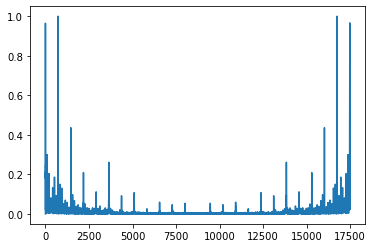

In [31]:
plt.plot(fft_frequencies)
plt.show()

In [36]:
N = sampling_rate * input_points
y_fft = fft(center_function(signal))
x_fft = fftfreq(input_points, 1/sampling_rate)


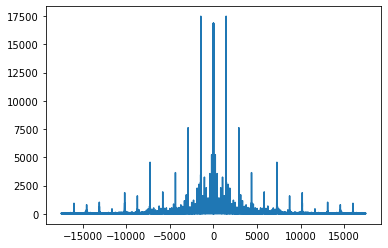

In [37]:
plt.plot(x_fft, np.abs(y_fft))
plt.show()

### Trying with rfft and rfftfreq

In [45]:
N = sampling_rate * input_points
y_rfft = rfft(center_function(signal))
x_rfft = rfftfreq(input_points, 1/sampling_rate)


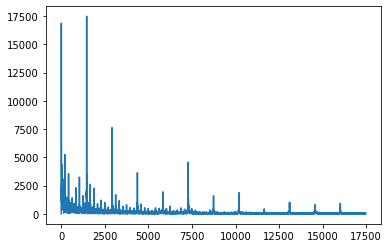

In [46]:
plt.plot(x_rfft, np.abs(y_rfft))
plt.show()

### Apply the inverse rfft

In [284]:
import numpy as np
import scipy.fft as fft

# Original signal
signal = [1, 2, 3, 4, 5]

# Desired extended timespan
extended_length = 10

# Compute the frequency spectrum
spectrum = fft.rfft(signal)

# Extend the spectrum
extended_spectrum = np.pad(spectrum, (0, extended_length - len(spectrum)), 'constant')

# Perform inverse Fourier transform
extended_signal = fft.irfft(extended_spectrum)

print(extended_signal)


[0.27777778 0.1707384  0.23766742 0.42406377 0.63873438 0.79694397
 0.85816861 0.84101624 0.80882005 0.83333333 0.95431782 1.15475947
 1.36405361 1.48824536 1.45351253 1.24260289 0.90694779 0.54829656]


In [292]:
len(spectrum)

3

In [293]:
 np.pad(signal, (0, (extended_length - len(spectrum))), 'constant')

array([1, 2, 3, 4, 5, 0, 0, 0, 0, 0, 0, 0])